In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\img\customer_churn_dataset-testing-master.csv")


 تنظيف أسماء الأعمدة من أي مسافات

In [5]:

df.columns = df.columns.str.strip()

print("الأعمدة الأصلية:", df.columns.tolist())


الأعمدة الأصلية: ['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend', 'Last Interaction', 'Churn']


Remove Unnecessary Columns

In [6]:
df = df.drop(columns=["CustomerID", "Age", "Gender"], errors="ignore")

print("الأعمدة بعد التنضيف:", df.columns.tolist())


الأعمدة بعد التنضيف: ['Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend', 'Last Interaction', 'Churn']


 Keep Only Numerical + Target

In [7]:
num_df = df.select_dtypes(include=['int64', 'float64']).copy()

print("الأعمدة الرقمية المختارة:", num_df.columns.tolist())
num_df.head()

الأعمدة الرقمية المختارة: ['Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn']


,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
0,25,14,4,27,598,9,1
1,28,28,7,13,584,20,0
2,27,10,2,29,757,21,0
3,9,12,5,17,232,18,0
4,58,24,9,2,533,18,0


Check Target Distribution

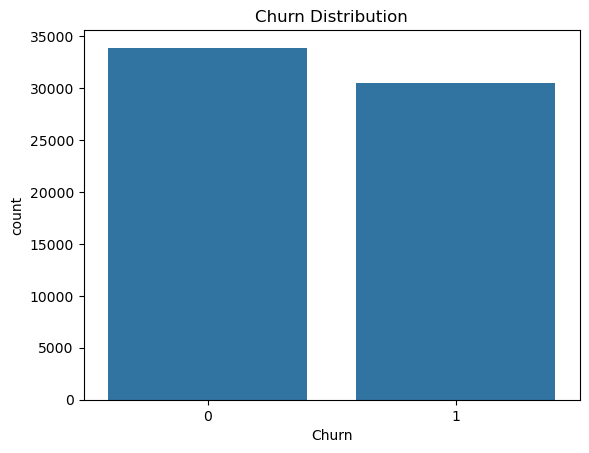

In [8]:
sns.countplot(x="Churn", data=num_df)
plt.title("Churn Distribution")
plt.show()

Numerical Features vs Churn

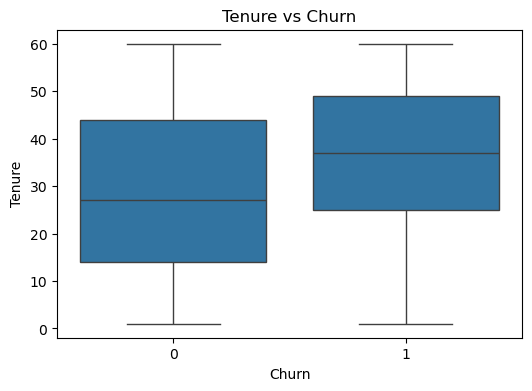

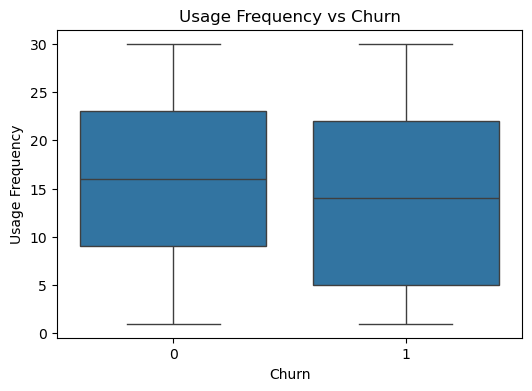

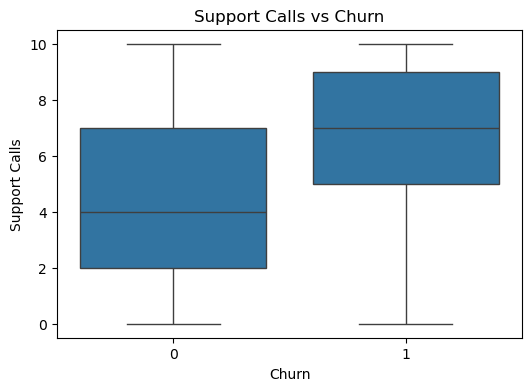

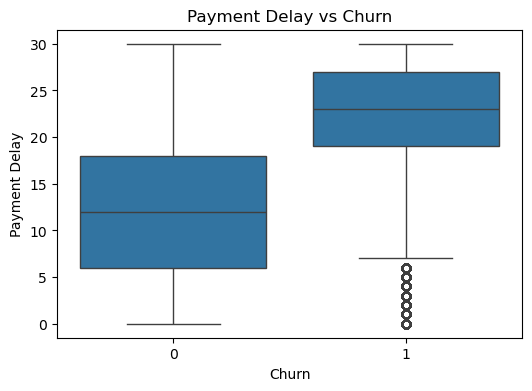

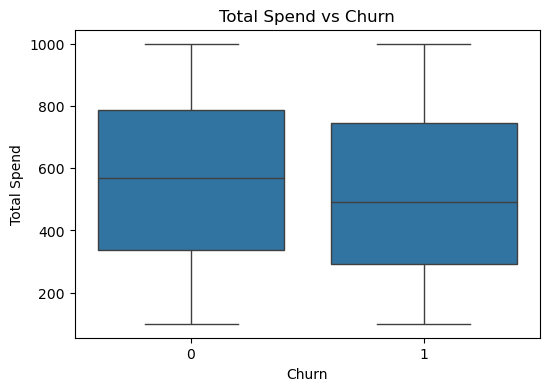

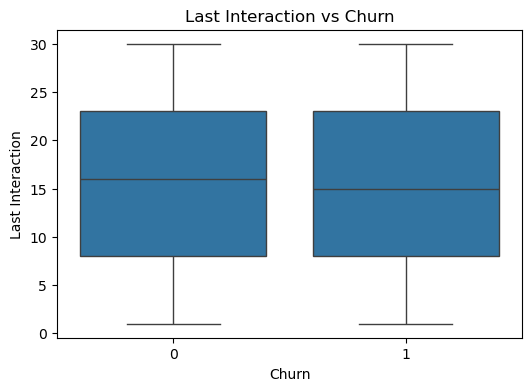

In [9]:
num_cols = [col for col in num_df.columns if col != "Churn"]

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Churn", y=col, data=num_df)
    plt.title(f"{col} vs Churn")
    plt.show()

Correlation Heatmap

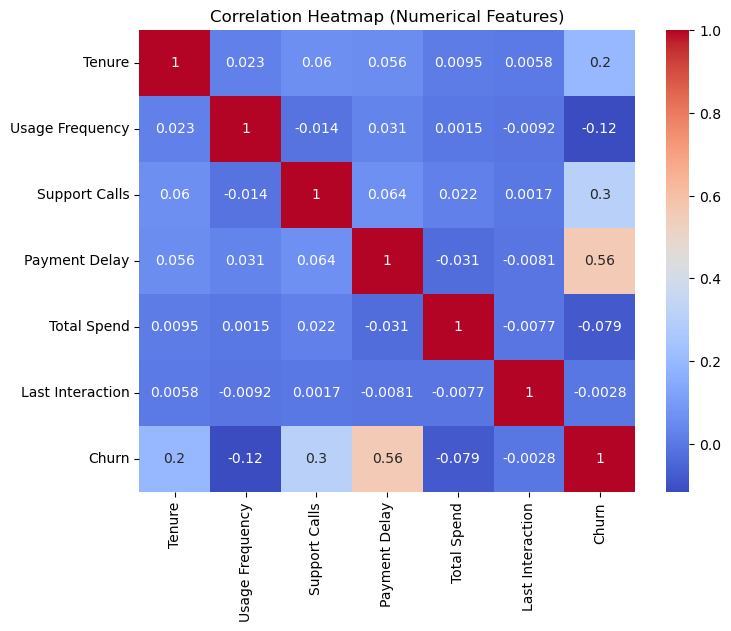

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


Summary Insights

In [11]:
print("Churn rate:", num_df["Churn"].mean()*100, "%")

for col in num_cols:
    print(f"\n{col} grouped by Churn:")
    print(num_df.groupby("Churn")[col].mean())


Churn rate: 47.368502811694164 %

Tenure grouped by Churn:
Churn
0    28.826481
1    35.515200
Name: Tenure, dtype: float64

Usage Frequency grouped by Churn:
Churn
0    16.042915
1    14.010593
Name: Usage Frequency, dtype: float64

Support Calls grouped by Churn:
Churn
0    4.500753
1    6.400617
Name: Support Calls, dtype: float64

Payment Delay grouped by Churn:
Churn
0    12.453086
1    22.334897
Name: Payment Delay, dtype: float64

Total Spend grouped by Churn:
Churn
0    560.541956
1    519.336143
Name: Total Spend, dtype: float64

Last Interaction grouped by Churn:
Churn
0    15.521944
1    15.473191
Name: Last Interaction, dtype: float64


Data Preprocessing

In [12]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


تعويض القيم الناقصة بالـ Median

In [13]:
if "Total Spend" in df.columns:
    df["Total Spend"] = df["Total Spend"].fillna(df["Total Spend"].median())
if "Usage Frequency" in df.columns:
    df["Usage Frequency"] = df["Usage Frequency"].fillna(df["Usage Frequency"].median())

Encode Categorical Variables

In [14]:
cat_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("الأعمدة بعد الـ Encoding:", df_encoded.columns.tolist())

الأعمدة بعد الـ Encoding: ['Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn', 'Subscription Type_Premium', 'Subscription Type_Standard', 'Contract Length_Monthly', 'Contract Length_Quarterly']


Scale Numerical Features

In [15]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop("Churn", errors="ignore")  # ما نعملش scaling للـ Target

df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])


Save Cleaned Dataset

In [16]:
df_encoded.to_csv("cleaned_customer_churn.csv", index=False)
print("✅ تم حفظ الملف: cleaned_customer_churn.csv")

✅ تم حفظ الملف: cleaned_customer_churn.csv
